In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.io as ski


In [3]:
imagem = 'Questionario-3-Imagem-3.tif'

In [4]:
im = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)  # l6e a imagem em escala de cinza

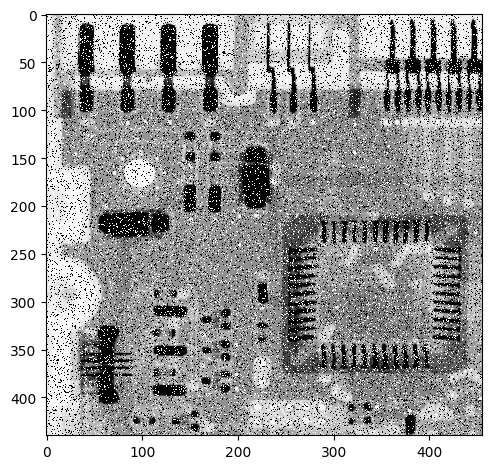

In [5]:
ski.imshow(im)

In [6]:
n = int((input('Dimensão n do filtro da mediana (n x n) \n')))

median_filter = np.zeros((n,n))   # cria uma matriz  n x n  de zeros  para demonstrar dimensões do filtro
median_filter

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
top, bottom, left, right = [n//2]*4

# adiciona padding na imagem (para nao perder informação da borda) 
im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REPLICATE, value = (0,0,0))  

#https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/copyMakeBorder/copyMakeBorder.html

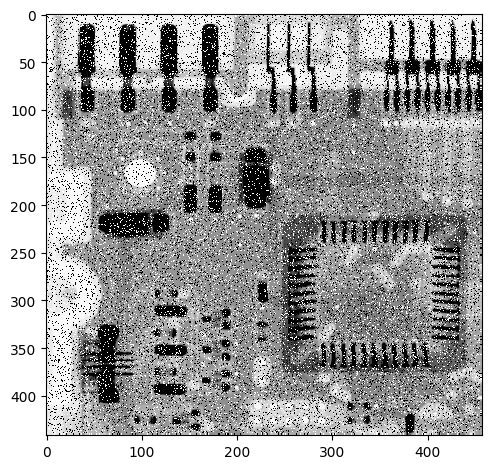

In [8]:
ski.imshow(im)

In [9]:
row, column = im.shape

In [10]:
im2 = np.copy(im)  #copia a imagem

for i in range(0, row):                   # itera sobre as linhas da imagem
    for j in range(0, column):            # itera sobre as colunas da imagem
        median_filter = []
            
        for k in range(i, i + n):         # kernel n x n que itera sobre a região n x n na imagem
            for l in range(j, j + n):
                try:                      # necessario para interromper na ultima linha/coluna (problema com a indexação)
                    median_filter.append(im[k,l])   # cria uma lista com os valores da região do kernel n x n 
                except: pass

        try:   # atribui a mediana na região central  [i + n//2  , j + n//2 ]
            im2[(i + n//2),(j + n//2)] = np.median(median_filter) 
        except: pass  


Text(0.5, 1.0, 'Filtro da mediana com função (cv2)')

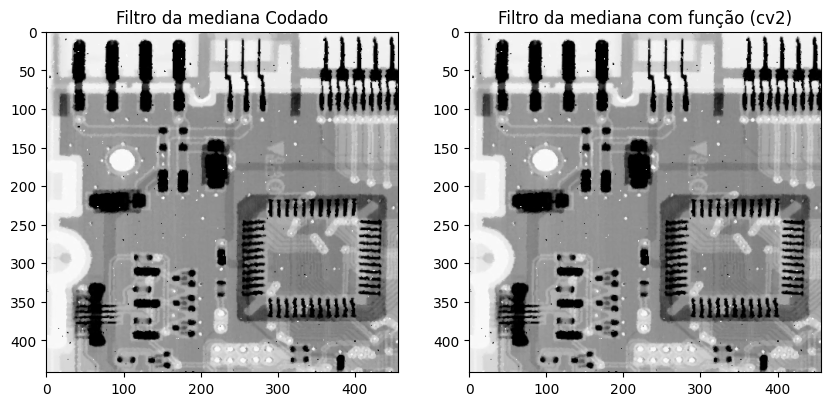

In [11]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

ax[0].imshow(im2, cmap = 'gray')
ax[0].set_title(f'Filtro da mediana Codado')

ax[1].imshow(cv2.medianBlur(im,n,n), cmap = 'gray')
ax[1].set_title('Filtro da mediana com função (cv2)')

In [12]:
cv2.imwrite(f'Filtro da mediana ({n}x{n}).png',im2)

True